<a href="https://colab.research.google.com/github/Nelsontorresjr330/CS5265-Repo/blob/main/Main_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Assignment


## Proposed Project - NFL Data to predict future games

## Background 
### I am a huge sports fan (NFL and Soccer mostly) & luckily for me there is a ton of readily available data online for all fans to use. The dataset I chose uses Football data to start but I could see myself dabbling in other sports later on.
### There are tons of available scholarly articles & professionals who dedicate their lives to determining game results. Its ultimately impossible to perfectly predict every game though as there are essentially infinite variables to consider but I believe there is some fun/opportunity in trying to get as accurate as possible. One example of someone using data to try and predict results is https://www.activestate.com/blog/how-to-predict-nfl-winners-with-python/ . I will be referencing this one throughout the semester most likely as its broken down clearly and easy to digest.


## Project Description
### The final goal for my project is to reach around 60% accuracy on game predictions, the specific dataset I plan on using is provided by FiveThirtyEight (https://data.fivethirtyeight.com/). Their nfl-elo dataset hosts 17380 rows and 33 columns with date, boolean, integer, string, and float data types. To fit the assignment description a bit better I can widdle down the number of columns since I dont think they will all be necessary.
### My plan in a nutshell is essentially to weigh the columns initally in terms of how I believe they contribute to the final score, then let the modeling algorithm grow from their and discover the weights on it's own. 
### To me, the most important stats are: 
- playoff (BOOL : Whether or not the game was a playoff game)
- elo_pre scores (FLOAT : Overall team rating going into the games)
- elo_prob scores (FLOAT: A teams chance of winning based solely on their elo)
- qbelo_pre scores (FLOAT : Overall QB rating going into the games)
- qbelo_prob scores (FLOAT : A teams chance of winning based solely on their QB Elo)
- qbelo_post scores (FLOAT : A QB rating after the given games) 
- quality (INT : A game's quality score based on the teams' pregame elo ratings, scaled from 0-100)
- importance (INT : Rating of games importance based on how the result would affect the models foraecasted playoff odds, scaled from 0-100)
- total_rating (INT : The average of quality and importance)

### For a description of all the columns -> https://github.com/fivethirtyeight/data/tree/master/nfl-elo

## Performance Metric 
### The dataset provides data as of February 2023 or the end of the most recent NFL season. To determine how well my model works, I will compare the model's predicted score to the true end result and the closer the model is to the actual score, the better the model. Ideally, my model will be able to predict around 60% of the games correctly.
### Initially, the goal is just to get a win or loss model working, then compare the predicted results to the actual ones and once satisfied with those, I will move on to predicting scores outright.
# Total Accuracy Percentage = Σ(games_predicted_correctly) / Σ(all_games_predicted) 


# Week 3 Assignment

## EDA



### Questions


*   Which teams are most consistant in terms of following their predicted scores?
*   How well can someone get their algorithm to predict games?
*   At which point is data no longer useful for current teams?
*   Are win / loss streaks a major factor in a team's performance? 

In [3]:
#Tables and Visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Initial DF
url = 'https://raw.githubusercontent.com/Nelsontorresjr330/CS5265-Repo/main/nfl_elo.csv'
raw_df = pd.read_csv(url, index_col=0)
raw_df.columns

Index(['season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

In [5]:
#Elo-Based Favorites
#Since the data doesn't provide explicit favorites as a column,
#I'll add one based on the team's elos probability, the team with
#The greater elo_prob is the favorite

df_w_fav = raw_df.copy()
df_w_fav['Favorite'] = np.where(raw_df['elo_prob1'] >= raw_df['elo_prob2'], raw_df['team1'], raw_df['team2'])
print(df_w_fav[['team1','team2','elo_prob1','elo_prob2','Favorite']])

           team1 team2  elo_prob1  elo_prob2 Favorite
date                                                 
1920-09-26   RII   STP   0.824651   0.175349      RII
1920-10-03   AKR   WHE   0.824212   0.175788      AKR
1920-10-03   BFF   WBU   0.802000   0.198000      BFF
1920-10-03   DAY   COL   0.575819   0.424181      DAY
1920-10-03   RII   MUN   0.644171   0.355829      RII
...          ...   ...        ...        ...      ...
2023-01-22   BUF   CIN   0.648277   0.351723      BUF
2023-01-22    SF   DAL   0.683613   0.316387       SF
2023-01-29   PHI    SF   0.450672   0.549328       SF
2023-01-29    KC   CIN   0.600966   0.399034       KC
2023-02-12   PHI    KC   0.375176   0.624824       KC

[17379 rows x 5 columns]


In [6]:
#Favored Team Win
#Another additional column for if the favored team won, as a Boolean

df_w_fav_win = df_w_fav.copy()
df_w_fav_win['Favorite_won'] = np.where((((df_w_fav['team1'] == df_w_fav['Favorite']) & (df_w_fav['score1'] > df_w_fav['score2'])) | ((df_w_fav['team2'] == df_w_fav['Favorite']) & (df_w_fav['score2'] > df_w_fav['score1']))), True, False) 
print(df_w_fav_win[['team1','team2','Favorite','score1','score2','Favorite_won']])

           team1 team2 Favorite  score1  score2  Favorite_won
date                                                         
1920-09-26   RII   STP      RII      48       0          True
1920-10-03   AKR   WHE      AKR      43       0          True
1920-10-03   BFF   WBU      BFF      32       6          True
1920-10-03   DAY   COL      DAY      14       0          True
1920-10-03   RII   MUN      RII      45       0          True
...          ...   ...      ...     ...     ...           ...
2023-01-22   BUF   CIN      BUF      10      27         False
2023-01-22    SF   DAL       SF      19      12          True
2023-01-29   PHI    SF       SF      31       7         False
2023-01-29    KC   CIN       KC      23      20          True
2023-02-12   PHI    KC       KC      35      38          True

[17379 rows x 6 columns]


In [7]:
#Next get the total count of times each team was favorited and won & divide it by the total times they were favorited

total_favorites = df_w_fav_win['Favorite'].value_counts()
favorites_won = df_w_fav_win.loc[df_w_fav_win['Favorite_won']==True].groupby('Favorite')['Favorite_won'].count()
favs_percents = favorites_won / total_favorites
favs_percents.dropna().sort_values()#['TEN'] #You can index by any team you'd like to see

LOU    0.250000
NYA    0.285714
TOR    0.285714
CRA    0.307692
DHR    0.333333
         ...   
DWL    1.000000
LAB    1.000000
KCB    1.000000
SLA    1.000000
CHT    1.000000
Length: 74, dtype: float64

### Future Engineering
Even with just this quick test to see the most consistant teams, I can see a few columns I need to add to help out / already added. I added a few already (Favorites, Favorites_Won, Favs_Percents) but another one I might need is something along the lines of "QB still on team", "Team currently in NFL" or "Team still mostly in NFL". Most of these are just to make sure the predictions for future games are accurate but might not be completely accurate since to make predictions I can basically assume they're all true. Still I imagine many more random columns will come along the way.

### Train/Test Split
I'm not entirely certain on my ideal Train Test Split but I believe what I would like to do to start off is train my model with every season prior to 2020 and test it with the 2021 and 2022 seasons. Each NFL season has about 250 or so games so this should provide about 16,500 games of training and 500 of testing (97% Train, 3% Test). This probably isnt the greatest split but its where I would like to start since I'm only really interested in predicting recent/upcoming games.

### Initial Pipeline
I am also not entirely certain on the exact specifics for the pipeline but I do know there will be a handful of operations necessary in the pipeline, I'm just not sure how to go about implementing them. For example, the older NFL data does not provide, for example there are no QB elo stats prior to 1950 so all of those columns, if I intend to use the data prior to 1950, must be ran through Imputers. As mentioned before, there are already a handful of calculations and features I've implemented that will need to go through column transformers. There may be other parts I need to add to the pipeline later on but as of now this is all I can think of and then the final model fitting part of the pipeline.

### Model Fitting and Evaluation
After going through this assignment, I feel very confident in my future model. I believe I'll be able to hit my personal goals for the model. Some assumptions I have about the features are:

*   The model will rely heavily on the Pre_Elo values instead of features added onto it
*   The generic linear regression model will perform best



# Week 4 Assignment


## Exploratory data analysis and Data cleaning

In [8]:
#Initial Data Cleaning starts with removing all non-active NFL teams
# active_nfl_teams = ['ARI','ATL','']
# sorted(df_w_fav_win.team2.unique())

df_to_clean = df_w_fav_win.copy()
all_teams = df_to_clean.team2.unique()

curr_teams = []
for team in all_teams:
  # print(df_to_clean.where(df_to_clean.team2 == team).dropna(how = 'all').index.max()[0:4], ' ', team)
  # If the teams most recent game was played after 2022,
  # Add it to the list of current teams
  if int(df_to_clean.where(df_to_clean.team2 == team).dropna(how = 'all').index.max()[0:4]) >= 2022:
    curr_teams.append(team)

len(curr_teams)


32

In [9]:
#Filter the DF by making sure either team1 or team2 are still in the NFL
#Additional filter to make sure at MOST 3 columns contain NaN (really just 2 since non-playoff games are NaN)
df_filtered = df_to_clean[((df_to_clean['team1'].isin(curr_teams))|(df_to_clean['team2'].isin(curr_teams)))].dropna(thresh = (len(df_to_clean.columns)-3))

### The above filtering has cleared up a ton of unneccesary rows, it removed all games where both teams are not in the NFL currently and also all games with 2 or more missing values

## Feature Engineering



*   Favored Team to Win Game Column
*   Did favored team the Game Column
*   All games feature an active NFL team
*   All rows contain at most 3 NaN values





## ML Pipeline


In [54]:
#ML Libs
#Most of the pipeline will be me trying my best to follow the steps from Week 4 lecture
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [55]:
#Start off by declaring the column we're trying to find
nfl_df = df_filtered.copy()
class_column = ['Favorite_won']
random_seed = 1234

X_train, X_test, y_train, y_test = train_test_split(nfl_df.drop(columns=class_column), nfl_df[class_column],
                                                   test_size=0.05, random_state=random_seed, stratify=nfl_df[class_column]) #Test size of 5% for most recent seasons

In [56]:
#Sanity Checks
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (14455, 33)


,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating,Favorite
date,,,,,,,,,,,,,,,,,,,,,
1964-10-25,1964,0,NaN,PIT,PHI,1497.321000,1431.312000,0.680082,0.319918,1450.767000,...,61.184079,84.628937,1446.165752,1474.950716,10,34,28.0,NaN,NaN,PIT
1976-10-03,1976,0,NaN,SEA,DAL,1261.976000,1659.688000,0.128393,0.871607,1255.792000,...,33.135180,179.386308,1264.181465,1661.318257,13,28,14.0,NaN,NaN,DAL
2021-10-10,2021,0,NaN,WSH,NO,1459.149097,1594.210628,0.400518,0.599482,1439.858426,...,86.575625,150.942690,1472.118093,1575.658540,22,33,35.0,77.0,56.0,NO
1989-10-08,1989,0,NaN,NE,TEN,1445.521000,1544.650000,0.451042,0.548958,1472.263000,...,30.814438,106.918074,1483.040359,1509.813374,23,13,46.0,NaN,NaN,TEN
2005-10-02,2005,0,NaN,NE,LAC,1697.402000,1547.560000,0.774994,0.225006,1642.111000,...,147.414934,151.993022,1586.280045,1561.920728,17,41,83.0,NaN,NaN,NE



On X test: 
X test dimensions:  (761, 33)


,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating,Favorite
date,,,,,,,,,,,,,,,,,,,,,
1950-12-03,1950,0,NaN,NYG,NYY,1578.862,1431.994,0.771995,0.228005,1594.696,...,19.849671,28.111855,1598.369032,1410.674752,51,7,51.0,NaN,NaN,NYG
1968-09-29,1968,0,NaN,GB,DET,1618.783,1485.546,0.757890,0.242110,1586.366,...,133.356255,108.666327,1594.740532,1514.274070,17,23,86.0,NaN,NaN,GB
1982-12-06,1982,0,NaN,DET,NYJ,1500.597,1552.134,0.519365,0.480635,1471.620,...,71.344082,106.909227,1479.661263,1582.646680,13,28,72.0,NaN,NaN,DET
1989-11-19,1989,0,NaN,NYG,SEA,1604.482,1461.107,0.768436,0.231564,1615.334,...,74.370923,29.111155,1613.541678,1451.008696,15,3,50.0,NaN,NaN,NYG
1987-12-20,1987,0,NaN,NYJ,PHI,1480.308,1433.781,0.655206,0.344794,1446.007,...,46.155968,80.791833,1450.930953,1462.915458,27,38,28.0,NaN,NaN,NYJ


In [57]:
# X Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# X test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (14455, 1)


,Favorite_won
date,
1964-10-25,False
1976-10-03,True
2021-10-10,True
1989-10-08,False
2005-10-02,False



On y test: 
y test dimensions:  (761, 1)


,Favorite_won
date,
1950-12-03,True
1968-09-29,False
1982-12-06,False
1989-11-19,True
1987-12-20,False


In [58]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15216 entries, 1950-09-16 to 2023-02-12
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          15216 non-null  int64  
 1   neutral         15216 non-null  int64  
 2   playoff         589 non-null    object 
 3   team1           15216 non-null  object 
 4   team2           15216 non-null  object 
 5   elo1_pre        15216 non-null  float64
 6   elo2_pre        15216 non-null  float64
 7   elo_prob1       15216 non-null  float64
 8   elo_prob2       15216 non-null  float64
 9   elo1_post       15216 non-null  float64
 10  elo2_post       15216 non-null  float64
 11  qbelo1_pre      15216 non-null  float64
 12  qbelo2_pre      15216 non-null  float64
 13  qb1             15216 non-null  object 
 14  qb2             15216 non-null  object 
 15  qb1_value_pre   15216 non-null  float64
 16  qb2_value_pre   15216 non-null  float64
 17  qb1_adj         15216 

In [80]:
#Not too sure how useful categorical pipeline will be
#Needed to add handle_unknown to make sure it can handle random QBs
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder(handle_unknown = 'ignore'))])

num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(strategy='mean')),
                               ('scale_num', StandardScaler())])

In [81]:
#Might have to drop the QBs from the lists as they skew the data as shown further down
cat_cols = ['Favorite','season', 'neutral', 'playoff', 'team1','team2','qb1','qb2']
num_cols = ['elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
'qbelo1_pre', 'qbelo2_pre', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 
'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 
'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality','importance', 
'total_rating']

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, cat_cols),
                             ('num_pipe', num_pipeline, num_cols)],
                             remainder='passthrough')

In [82]:
#Establish the pipeline using LR
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#Visualization 
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Favorite', 'season',
                                                   'neutral', 'playoff',
                                                   'team1', 'team2', 'qb1',
                                                   'qb2']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()...
                                                   'elo1_post', 'elo2_post',
                                                   'qbelo1_pre', 'qbelo2_pre',
                                                   'qb1_value_pre',
                                                   'qb2_value_pre', 'qb1_adj',
                                                   'qb2_adj', 'qbelo_prob1',
                                                   'qbelo_prob2',
                                                   'qb1_game_value',
                                                   'qb2_game_value',
                                                   'qb1_value_post',
                                                   'qb2_value_post',
                                                   'qbelo1_post', 'qbelo2_post',
                                                   'score1', 'score2',
                                                   'quality', 'importance',
                                                   'total_rating'])])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

In [83]:
#Start of hyperparam tuning
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True, n_jobs=-1)

In [84]:
tuning_grid

{'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06])}

In [85]:
#Initial fit
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Favorite',
                                                                          'season',
                                                                          'neutral',
                                                                          'playoff',
                                                                          'team1',
                                                                          'team2',
                                                                          'qb1',
                                                                          'qb2']),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[(...
                                                                          'qb1_value_post',
                                                                          'qb2_value_post',
                                                                          'qbelo1_post',
                                                                          'qbelo2_post',
                                                                          'score1',
                                                                          'score2',
                                                                          'quality',
                                                                          'importance',
                                                                          'total_rating'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             n_jobs=-1,
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [86]:
print(grid_search.best_score_)
grid_search.best_params_

0.7216879972327914


{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}

In [87]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.209929,0.011444,0.026053,0.005911,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",0.705292,0.714286,0.711864,...,0.711726,0.007353,5,0.733224,0.746800,0.741958,0.746714,0.741525,0.742044,0.004950
1,0.376609,0.028818,0.025154,0.003763,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",0.713594,0.721550,0.707022,...,0.716499,0.007749,4,0.723798,0.737634,0.736423,0.744466,0.739536,0.736371,0.006859
2,0.287383,0.027937,0.025597,0.003304,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",0.716015,0.719820,0.712902,...,0.720443,0.006001,3,0.719820,0.731494,0.729678,0.741698,0.736856,0.731909,0.007370
3,0.294425,0.020717,0.026632,0.003648,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",0.716361,0.722241,0.716361,...,0.721550,0.005102,2,0.716534,0.730111,0.728727,0.738239,0.734089,0.729540,0.007301
4,0.293833,0.025234,0.023907,0.001160,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",0.716361,0.720166,0.718091,...,0.721688,0.004592,1,0.716015,0.728035,0.730457,0.736337,0.734694,0.729108,0.007181
5,0.537307,0.059904,0.024023,0.001042,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.694223,0.693532,0.703909,...,0.697821,0.009517,12,0.742736,0.751211,0.749827,0.757091,0.749135,0.750000,0.004589
6,4.203882,0.825321,0.024117,0.002321,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.693532,0.695261,0.703217,...,0.698028,0.009379,6,0.743168,0.751211,0.749654,0.757177,0.748443,0.749931,0.004520
7,4.567106,0.715973,0.023493,0.001593,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.693186,0.693532,0.703563,...,0.697890,0.009117,10,0.742736,0.751384,0.749568,0.757177,0.748789,0.749931,0.004644
8,4.423316,1.066488,0.022755,0.000455,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.694569,0.693532,0.704255,...,0.697890,0.008834,10,0.742736,0.751730,0.749395,0.757350,0.749481,0.750138,0.004697
9,4.487617,0.675041,0.025848,0.005116,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.692840,0.694569,0.703909,...,0.697959,0.008694,7,0.742996,0.751730,0.749568,0.757350,0.748789,0.750086,0.004641


In [88]:
grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Favorite', 'season',
                                                   'neutral', 'playoff',
                                                   'team1', 'team2', 'qb1',
                                                   'qb2']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()...
                                                   'qbelo1_pre', 'qbelo2_pre',
                                                   'qb1_value_pre',
                                                   'qb2_value_pre', 'qb1_adj',
                                                   'qb2_adj', 'qbelo_prob1',
                                                   'qbelo_prob2',
                                                   'qb1_game_value',
                                                   'qb2_game_value',
                                                   'qb1_value_post',
                                                   'qb2_value_post',
                                                   'qbelo1_post', 'qbelo2_post',
                                                   'score1', 'score2',
                                                   'quality', 'importance',
                                                   'total_rating'])])),
                ('mdl',
                 LogisticRegression(C=0.1, l1_ratio=1.0, penalty='elasticnet',
                                    solver='saga', tol=0.01))])

In [89]:
grid_search.classes_

array([False,  True])

In [90]:
coefs = grid_search.best_estimator_['mdl'].coef_[0]
coefs

array([-0.00495712, -0.11386067,  0.        , ..., -0.37608437,
       -0.00364989, -0.01976399])

In [91]:
grid_search.best_estimator_.named_steps['preproc'].transformers_

[('cat_pipe',
  Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                  ('onehot_cat', OneHotEncoder(handle_unknown='ignore'))]),
  ['Favorite',
   'season',
   'neutral',
   'playoff',
   'team1',
   'team2',
   'qb1',
   'qb2']),
 ('num_pipe',
  Pipeline(steps=[('impute_num', SimpleImputer()),
                  ('scale_num', StandardScaler())]),
  ['elo1_pre',
   'elo2_pre',
   'elo_prob1',
   'elo_prob2',
   'elo1_post',
   'elo2_post',
   'qbelo1_pre',
   'qbelo2_pre',
   'qb1_value_pre',
   'qb2_value_pre',
   'qb1_adj',
   'qb2_adj',
   'qbelo_prob1',
   'qbelo_prob2',
   'qb1_game_value',
   'qb2_game_value',
   'qb1_value_post',
   'qb2_value_post',
   'qbelo1_post',
   'qbelo2_post',
   'score1',
   'score2',
   'quality',
   'importance',
   'total_rating'])]

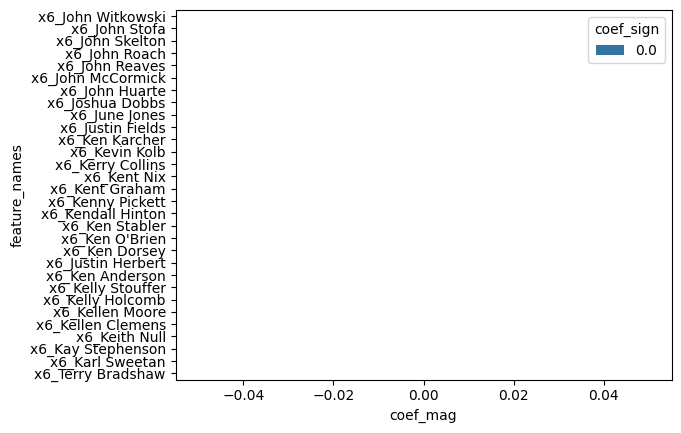

In [92]:
#https://stackoverflow.com/questions/58756515/onehotencoder-object-has-no-attribute-get-feature-names
cat_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# get back the numerical features - recall that index 1 was the num_pipe
num_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[1][2]

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names, num_names]), 'feature_imp': coefs})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['feature_imp']),
                             coef_sign = np.sign(coef_info['feature_imp']))

# sort the coef_info dataframe and plot with a barplot! 
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False).tail(30)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

In [93]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.69      0.41      0.51       268
        True       0.74      0.90      0.81       493

    accuracy                           0.73       761
   macro avg       0.71      0.65      0.66       761
weighted avg       0.72      0.73      0.71       761



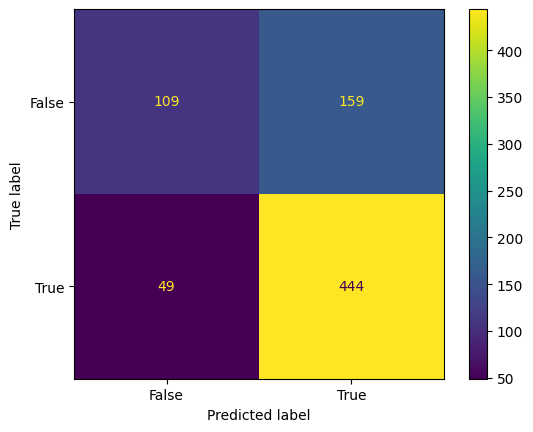

In [94]:
cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

## Final Evaluation / Thoughts

I will definitely need to go back and review the concepts of each of the steps in the pipeline. I have to do some more debugging and figure out how to resolve the issues that the QBs columns are causing me. From my understanding, the problems stem from the newer QBs in the test model not included in the training. I came to this conclusion during a debug run when the barplot would populate and display QB Brock Purdy as the most influential factor in the model. I realized Brock Purdy was a rookie this year and only played a handful of games (albeit he won all of them) and that probably causes issues. 

Another predicament I ran into is that the confusion matrix does not populate if I dont add the `handle_unknown = 'ignore'` snippet above in the `OneHotEncoder()`. Doing this though ignores so many values that the barplot doesn't get populated.

Despite these setbacks and problems I still need to address, I'm overall pretty content with the results. It predicted 72% of games accurately and thats more than I could hope honestly. I also think maybe a 95/5% split is not the most efficient so I might go back and tune that as well. 